# Bee NoBee Sound Classification - CNN Model

## Fetch Processed Data

In [ ]:
import numpy as np
from numpy import genfromtxt


### Transformed

In [ ]:
# extracting data from csv files into numpy arrays
x_train = genfromtxt('Data Urban Save/train_data.csv', delimiter=',')
y_train = genfromtxt('Data Urban Save/train_labels.csv', delimiter=',')
x_test = genfromtxt('Data Urban Save/test_data.csv', delimiter=',')
y_test = genfromtxt('Data Urban Save/test_labels.csv', delimiter=',')


In [ ]:
# converting to one hot
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape, y_test.shape


###  Not Transformed

In [ ]:
# extracting data from csv files into numpy arrays
x_train = genfromtxt('Data Urban Save/train_merged_data.csv', delimiter=',')
y_train = genfromtxt('Data Urban Save/train_merged_labels.csv',
                     delimiter=',', dtype=('<U5'))
x_test = genfromtxt('Data Urban Save/test_merged_data.csv', delimiter=',')
y_test = genfromtxt('Data Urban Save/test_merged_labels.csv',
                    delimiter=',', dtype=('<U5'))


In [ ]:
from collections import Counter
Counter(list(y_train)),Counter(list(y_test))

(Counter({'NoBee': 7895, 'Bee': 7337}), Counter({'NoBee': 837, 'Bee': 907}))

In [ ]:
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
labelencoder.fit(y_train)
y_train = to_categorical(labelencoder.transform(y_train))
y_test = to_categorical(labelencoder.transform(y_test))


### Main

In [ ]:
# shape
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((15232, 200), (1744, 200), (15232, 2), (1744, 2))

In [ ]:
# reshaping to 2D
x_train = np.reshape(x_train, (x_train.shape[0], 40, 5))
x_test = np.reshape(x_test, (x_test.shape[0], 40, 5))
x_train.shape, x_test.shape


((15232, 40, 5), (1744, 40, 5))

In [ ]:
# reshaping to shape required by CNN
x_train = np.reshape(x_train, (x_train.shape[0], 40, 5, 1))
x_test = np.reshape(x_test, (x_test.shape[0], 40, 5, 1))


In [ ]:
# shapes
x_train.shape, x_test.shape


((15232, 40, 5, 1), (1744, 40, 5, 1))

## Build Model

In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout


In [ ]:
# forming model
model = Sequential()


In [ ]:
# adding layers and forming the model
model.add(Conv2D(64, kernel_size=5, strides=1, padding="Same",
          activation="relu", input_shape=(40, 5, 1)))
model.add(MaxPooling2D(padding="same"))

model.add(Conv2D(128, kernel_size=5, strides=1,
          padding="same", activation="relu"))
model.add(MaxPooling2D(padding="same"))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(512, activation="relu"))
model.add(Dropout(0.3))

model.add(Dense(2, activation="sigmoid"))


In [ ]:
# compiling
model.compile(optimizer="adam", loss="binary_crossentropy",
              metrics=["accuracy"])


## Training

In [ ]:
# training the model
model.fit(x_train, y_train, batch_size=50, epochs=30,
          validation_data=(x_test, y_test))


Epoch 1/30
305/305 [==============================] - 11s 35ms/step - loss: 0.1540 - accuracy: 0.9487 - val_loss: 0.0375 - val_accuracy: 0.9903
Epoch 2/30
305/305 [==============================] - 10s 34ms/step - loss: 0.0357 - accuracy: 0.9892 - val_loss: 0.0284 - val_accuracy: 0.9908
Epoch 3/30
305/305 [==============================] - 11s 36ms/step - loss: 0.0248 - accuracy: 0.9934 - val_loss: 0.0048 - val_accuracy: 0.9989
Epoch 4/30
305/305 [==============================] - 11s 36ms/step - loss: 0.0215 - accuracy: 0.9940 - val_loss: 0.0096 - val_accuracy: 0.9966
Epoch 5/30
305/305 [==============================] - 13s 43ms/step - loss: 0.0173 - accuracy: 0.9955 - val_loss: 0.0284 - val_accuracy: 0.9914
Epoch 6/30
305/305 [==============================] - 11s 37ms/step - loss: 0.0190 - accuracy: 0.9958 - val_loss: 0.0071 - val_accuracy: 0.9989
Epoch 7/30
305/305 [==============================] - 10s 34ms/step - loss: 0.0162 - accuracy: 0.9953 - val_loss: 0.0250 - val_accuracy:

## Results

In [ ]:
# train and test loss and scores respectively
train_loss_score = model.evaluate(x_train, y_train)
test_loss_score = model.evaluate(x_test, y_test)
print(train_loss_score)
print(test_loss_score)


55/55 [==============================] - 0s 6ms/step - loss: 0.0073 - accuracy: 0.9994
[0.0002320154308108613, 0.9999343752861023]
[0.007328568957746029, 0.9994266033172607]


In [ ]:
results = model.predict(x_test)


55/55 [==============================] - 0s 6ms/step


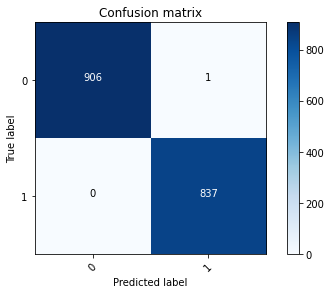

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import itertools


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Y_pred_classes = np.argmax(results, axis=1)
Y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
plot_confusion_matrix(confusion_mtx, classes=range(2))


## Saving

In [ ]:
model.save('BeeNoBeeModel')


INFO:tensorflow:Assets written to: BeeNoBeeModel\assets


INFO:tensorflow:Assets written to: BeeNoBeeModel\assets
